# Prepare Papilio butterfly data 
Prepare Michaels data for use in my and Mortens experiments.

In [1]:
# load libraries
import numpy as np
import pandas as pd
from ete3 import Tree
import matplotlib.pyplot as plt 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Butterfly data prep
datapath  = '/Users/lkn315/Library/CloudStorage/OneDrive-UniversityofCopenhagen/CCEM-data/butterfly_project'

In [3]:
phylogeny = Tree(datapath+'/papilio_male_dataset/papilio_tree.tree', format=1)
print(phylogeny)


                  /-Papilio_ambrax
               /-|
            /-|   \-Papilio_antimachus
           |  |
         /-|   \-Papilio_aristodemus
        |  |
      /-|   \-Papilio_cresphontes
     |  |
   /-|   \-Papilio_deiphobus
  |  |
  |   \-Papilio_gigon
  |
  |            /-Papilio_glaucus
  |         /-|
  |        |   \-Papilio_memnon
  |      /-|
--|     |  |      /-Papilio_phestus
  |     |  |   /-|
  |     |   \-|   \-Papilio_polytes
  |     |     |
  |   /-|      \-Papilio_polyxenes
  |  |  |
  |  |  |         /-Papilio_protenor
  |  |  |      /-|
  |  |  |   /-|   \-Papilio_slateri
   \-|  |  |  |
     |   \-|   \-Papilio_thoas
     |     |
     |      \-Papilio_troilus
     |
     |   /-Papilio_xuthus
      \-|
         \-Papilio_zelicaon


In [4]:
landmarks_raw = pd.read_csv(datapath+'/papilio_male_dataset/papilio_shapes.csv', index_col=0)
landmarks_raw.sort_index(inplace=True)
leaves = landmarks_raw.iloc[0:17]
leaves.T

node_names,Papilio_ambrax,Papilio_antimachus,Papilio_aristodemus,Papilio_cresphontes,Papilio_deiphobus,Papilio_gigon,Papilio_glaucus,Papilio_memnon,Papilio_phestus,Papilio_polytes,Papilio_polyxenes,Papilio_protenor,Papilio_slateri,Papilio_thoas,Papilio_troilus,Papilio_xuthus,Papilio_zelicaon
edges,6.176417,6.176417,11.328771,34.794098,42.669710,55.361330,12.983920,12.983920,8.290599,8.290599,10.001568,18.276289,18.276289,20.918991,22.988884,13.000591,13.000591
0,35.460520,27.990059,31.726970,33.500310,34.995420,34.288857,38.622950,33.799630,32.778553,32.868816,41.212600,35.408634,38.281982,33.124714,33.137894,40.287480,43.712368
1,72.098950,95.665160,62.409220,40.826920,83.104510,83.859400,29.940376,79.888520,98.389984,59.951508,49.650658,5.530631,91.385710,50.632175,30.714352,39.058216,72.877170
2,53.958755,38.199400,66.355835,61.824047,57.446640,54.872284,64.834640,51.221996,61.408333,54.030094,68.116104,49.768303,57.277000,59.830840,56.033207,65.576300,73.424480
3,106.088900,120.480660,92.809920,78.113810,119.424150,118.268745,71.630050,113.664570,131.157850,96.317140,85.034380,45.682896,115.512090,91.126350,74.671170,73.535760,102.678830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,141.760250,136.731630,135.050220,119.022255,163.703750,148.567720,118.670400,151.453780,173.198430,137.275180,123.350075,97.248200,142.030040,135.490600,123.177840,108.373980,141.516700
232,-49.629185,-41.773754,-67.822105,-59.575363,-58.684925,-54.902798,-65.108700,-49.509373,-63.512566,-52.946213,-67.082910,-45.584053,-54.825985,-61.272030,-58.589306,-62.518520,-75.831780
233,104.531600,110.325030,91.824460,74.795640,122.830956,110.133640,73.154940,112.387950,137.682630,97.550476,82.584496,53.780876,112.351280,92.500114,75.380810,70.325780,103.827990
234,-29.860062,-34.999554,-34.828490,-30.429562,-35.818184,-32.883938,-38.409570,-30.855413,-35.097500,-30.451305,-40.225110,-31.821650,-35.551857,-33.195152,-35.577236,-37.541676,-45.496640


In [5]:
# we rotate and scale the data
_leaves = -leaves.iloc[:,1::]/750

In [6]:
_leaves.T.to_csv('data/papilio_full_shape.csv', index=False)

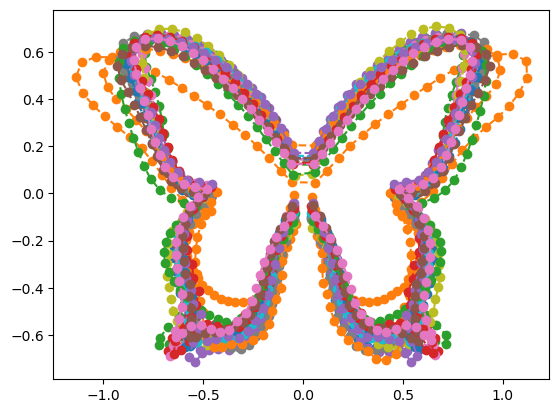

In [7]:
for i in range(_leaves.shape[0]):
    plt.plot(_leaves.iloc[i,0::2],_leaves.iloc[i,1::2], 'o--')

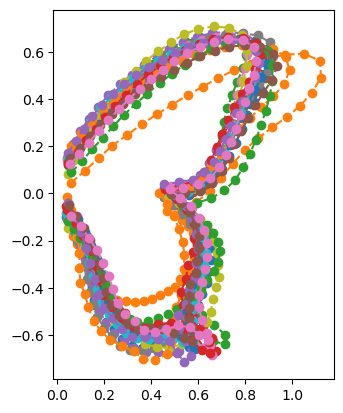

In [8]:
# select only right wing
rw_leaves = _leaves.iloc[:,118::]
for i in range(rw_leaves.shape[0]):
    plt.plot(rw_leaves.iloc[i,0::2],rw_leaves.iloc[i,1::2], 'o--')
    plt.gca().set_aspect('equal')

In [9]:
rw_leaves.T.to_csv('data/papilio_right_wing.csv', index=False)

## Downsample

In [10]:
dsf = 2
rw = np.array(rw_leaves)
dsrw = rw.reshape(17, 59, 2)
dsrw.shape

(17, 59, 2)

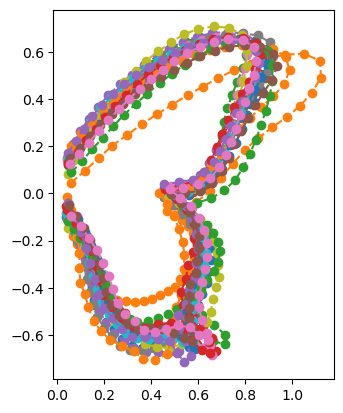

In [11]:
for i in range(dsrw.shape[0]):
    plt.plot(dsrw[i,:,0],dsrw[i,:,1], 'o--')
    plt.gca().set_aspect('equal')

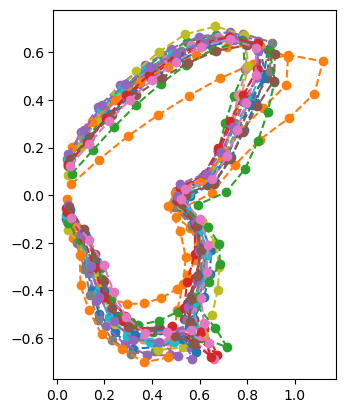

In [14]:
for i in range(dsrw.shape[0]):
    plt.plot(dsrw[i,::dsf,0],dsrw[i,::dsf,1], 'o--')
    plt.gca().set_aspect('equal')

In [16]:
downsampled = dsrw[:,::dsf,:]
ds = downsampled.reshape(17,-1)
ds.shape

(17, 60)

In [15]:
pd.DataFrame(ds, index=rw_leaves.index).T.to_csv('data/papilio_right_wing_downsampled.csv', index=False)